In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

In [2]:
prod = pd.read_excel("production.xlsx", index_col=0)

In [3]:
M_list = []
for i in prod.index:
    R = prod.loc[i]['R']
    L = prod.loc[i]['L']
    A = prod.loc[i]['A']

    M_list += [A/(R**(1/4)*L**(1/2))]

prod['M'] = M_list
prod


,R,L,A,M
2010,250,1000,126,1.002041
2011,255,1010,130,1.023641
2012,260,1020,133,1.037070
2013,265,1030,137,1.058012
2014,271,1041,142,1.084728
2015,276,1051,146,1.104903
2016,282,1062,151,1.130713
2017,288,1073,155,1.148639
2018,293,1083,160,1.175138
2019,299,1094,165,1.199658


Text(0.5, 0, 'Années')

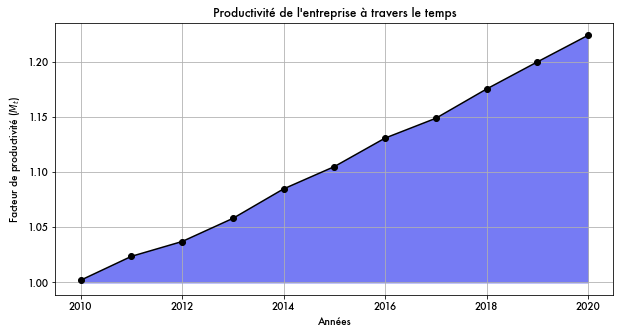

In [4]:
plt.rcParams.update({'font.sans-serif':'futura'})
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(prod['M'], 'o-', color="black", label="Productivité multi-factorielle de l'entreprise")
plt.title("Productivité de l'entreprise à travers le temps")
plt.fill_between(prod.index, prod['M'], [1 for i in prod.index], color="#767bf4")
plt.ylabel(r"Facteur de productivité ($ M_t $)")
plt.xlabel("Années")


In [5]:
print("Le rythme annuel moyen d'augmentation de la productivité mulifcatorielle est de {}% ".format(round(prod['M'].pct_change().mean()*100, 2)))

Le rythme annuel moyen d'augmentation de la productivité mulifcatorielle est de 2.02% 


# Question 2

$$ A_t = F_t(R_t, L_t) = M_t R_t^{1/4} L_t^{1/2}$$

$$ \frac{dL}{dA}\bigg\rvert_{dA=0} : 0=\frac{1}{2}M_t R_t^{1/4} L_t^{-1/2} $$
$$ \frac{dR}{dA}\bigg\rvert_{dA=0} : 0=\frac{1}{4}M_t R_t^{-3/4} L_t^{1/2} $$

$$ TMST = - \frac{\frac{1}{2}M_t R_t^{1/4} L_t^{-1/2}}{\frac{1}{4}M_t R_t^{-3/4} L_t^{1/2}} = -2\frac{R_t}{L_t}$$

In [6]:
def tmst(R, L):
    return -2 * (R/L)

TMST_list = []
for i in prod.index:
    R = prod.loc[i]['R']
    L = prod.loc[i]['L']

    TMST_list += [tmst(R, L)]

prod['TMST'] = TMST_list


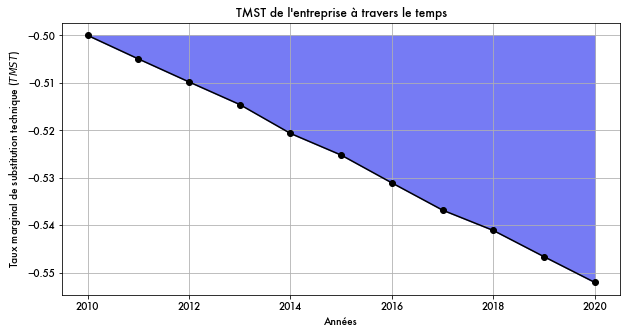

In [7]:
plt.rcParams.update({'font.sans-serif':'futura'})

plt.figure(figsize=(10,5))
plt.plot(prod['TMST'], 'o-', color="black")
plt.title("TMST de l'entreprise à travers le temps")
plt.fill_between(prod.index, prod['TMST'], [-0.5 for i in prod.index], color="#767bf4")
plt.ylabel(r"Taux marginal de substitution technique ($ TMST $)")
plt.xlabel("Années")
plt.grid(True)

On observe que le TMST diminue à travers les années. Cela signifie qu'à travers les 10 années, le coût exprimé en robots de remplacer un travailleur a diminué. Cela est logique avec l'avancée technologique qui fait en sorte que les robots deviennent de moins en moins cher comparativement aux humains.

# Question 3

In [8]:
costs = pd.read_excel("costs.xlsx", index_col=0)

In [9]:
costs['TMST'] = abs(prod['TMST'])
costs["prix_relatif"] = costs['pL']/costs['pR']

costs['diff'] = costs['prix_relatif'] - costs['TMST']
costs

,pL,pR,pA,G,pi,TMST,prix_relatif,diff
2010,45.000000,75.000000,550,1000,4550.000000,0.500000,0.600000,0.100000
2011,46.370454,74.625936,550,1000,4636.227767,0.504950,0.621372,0.116421
2012,47.782645,74.253738,550,1000,4105.730755,0.509804,0.643505,0.133701
2013,49.237843,73.883395,550,1000,4055.922151,0.514563,0.666426,0.151863
2014,50.737358,73.514900,550,1000,4359.871953,0.520653,0.690164,0.169511
2015,52.282541,73.148243,550,1000,4162.134311,0.525214,0.714748,0.189534
2016,53.874781,72.783415,550,1000,4310.059182,0.531073,0.740207,0.209133
2017,55.515513,72.420406,550,1000,3824.777884,0.536813,0.766573,0.229760
2018,57.206212,72.059208,550,1000,3932.324734,0.541090,0.793878,0.252788
2019,58.948400,71.699811,550,1000,3822.206560,0.546618,0.822156,0.275538


avoir plus de robot

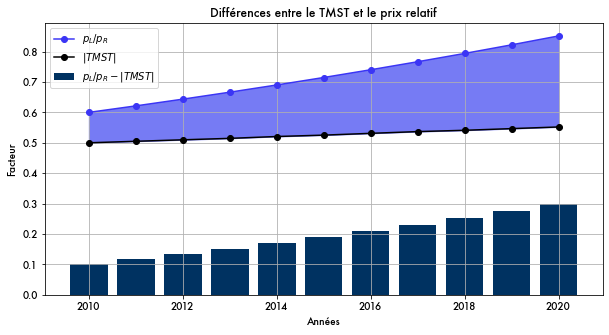

In [10]:
plt.rcParams.update({'font.sans-serif':'futura'})

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(costs['prix_relatif'], "o-", color="#3b35f5", label=r"$ p_L/p_R $")
plt.plot(costs['TMST'], "o-", color="black", label=r"$ |TMST| $")
plt.bar(costs.index, costs['diff'], color="#003261", label=r"$ p_L/p_R - |TMST| $")
plt.title("Différences entre le TMST et le prix relatif")
plt.fill_between(prod.index, costs['TMST'], costs['prix_relatif'], color="#767bf4")
plt.ylabel(r"Facteur")
plt.xlabel("Années")
plt.legend()


Puisque le TMST n'est pas égal au prix relatif, l'entreprise n'a jamais minimisé ses coûts au cours de la décennie. De plus, comme on le voit ci-haut, le prix relatif d'un travailleur en robots a toujours été plus élevé que le TMST. Cela signifie, que pour minimiser ses coûts, l'entreprise devrait réduire ses travailleurs en faveur de robots. De plus, on observe que le prix relatif a augmenté plus rapidement au fil des années que le TMST, ce qui indique que la stratégie de coûts de l'entreprise devient de plus en plus inefficace à travers les années.

# Question 4

Fonction des coûts:
$$ C(L,R,G) = p_L L + p_R R + G $$

Fonction de production (contrainte):
$$ F_t(R_t, L_t) = A_t =  M_t R_t^{1/4} L_t^{1/2} $$

Optimisation par le Lagrangien:
$$ L(L_t, R_t, \mu) = p_L L + p_R R + G + \mu(M_t R_t^{1/4} L_t^{1/2} - A_t) $$
$$ \frac{dL}{dA}\bigg\rvert_{dA=0} : 0=\frac{1}{2}M_t R_t^{1/4} L_t^{-1/2} $$
$$ \frac{dR}{dA}\bigg\rvert_{dA=0} : 0=\frac{1}{4}M_t R_t^{-3/4} L_t^{1/2} $$
$$ \frac{dM}{dA}\bigg\rvert_{dA=0} : A_t =  M_t R_t^{1/4} L_t^{1/2} $$
Demandes d'input conditionnelles:
$$ R_t^* = (\frac{A_t}{M_t})^{4/3}(\frac{p_L}{2p_R})^{2/3} $$
$$ L_t^* = (\frac{A_t}{M_t})^{4/3} (\frac{2p_R}{p_L})^{1/3} $$



In [11]:
def R_star(A, M, pL, pR):
    return (A/M)**(4/3)*(pL/(2*pR))**(2/3)

def L_star(A, M, pL, pR):
    return (A/M)**(4/3)*((2*pR)/pL)**(1/3)

costs['A'] = prod['A']
costs['M'] = prod['M']

R_star_ = []
L_star_ = []
for i in costs.index:
    A = costs.loc[i]['A']
    M = costs.loc[i]['M']
    pL = costs.loc[i]['pL']
    pR = costs.loc[i]['pR']

    R_star_ += [R_star(A, M, pL, pR)]
    L_star_ += [L_star(A, M, pL, pR)]

costs['R_star'] = R_star_
costs['L_star'] = L_star_


<AxesSubplot: title={'center': 'Après'}>

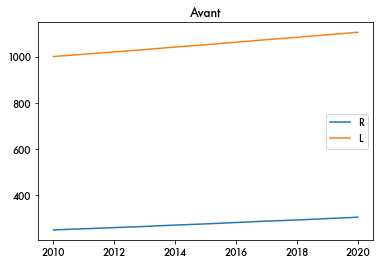

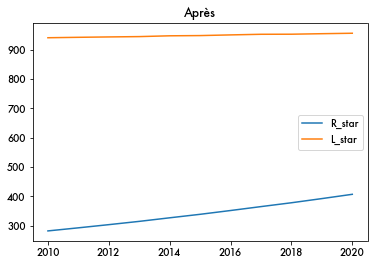

In [12]:
prod[['R', 'L']].plot(title="Avant")
costs[['R_star', 'L_star']].plot(title="Après")

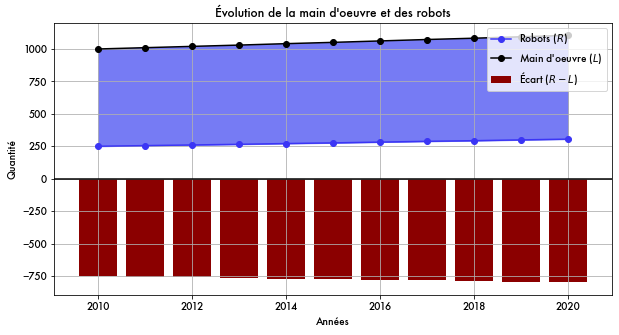

In [28]:
plt.rcParams.update({'font.sans-serif':'futura'})

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(prod['R'], "o-", color="#3b35f5", label=r"Robots ($ R $)")
plt.plot(prod['L'], "o-", color="black", label=r"Main d'oeuvre ($ L $)")
plt.bar(costs.index, prod['R'] - prod['L'], color="#8b0000", label=r"Écart ($ R - L $)")
plt.axhline(0, color='black')
plt.title("Évolution de la main d'oeuvre et des robots")
plt.fill_between(prod.index, prod['L'], prod['R'], color="#767bf4")
plt.ylabel(r"Quantité")
plt.xlabel("Années")
plt.legend()

En observant le graphique ci-haut, pour minimiser ses coûts l'entreprise doit augmenter son input de robots et diminuer (ou augmenter moins rapidement) sa demande de travailleurs.

# Question 5

Insérer les demandes conditionnelles dans la fonction des coûts:
$$ C(L,R,G) = p_L ((\frac{A_t}{M_t})^{4/3} (\frac{2p_R}{p_L})^{1/3} ) + p_R((\frac{A_t}{M_t})^{4/3}(\frac{p_L}{2p_R})^{2/3}) + G $$
$$ C(L,R,G) = (p^{2/3}(2*p_R)^{1/3}+ p_R^{1/3}(\frac{p_L}{2})^{2/3})(\frac{A_t}{M_t})^{4/3} + G$$


In [13]:
costs['costs_reel'] = costs['pL'] * prod['L'] + costs['pR'] * prod['R'] + costs['G']

costs['costs_opt'] = costs['pL'] * costs['L_star'] + costs['pR'] * costs['R_star'] + costs['G']

In [14]:
costs['gain_cumulatif'] = (costs['costs_reel'] - costs['costs_opt']).cumsum()

In [34]:
print(round(costs.iloc[-1]['gain_cumulatif'], 2), "$")

9326.92 $


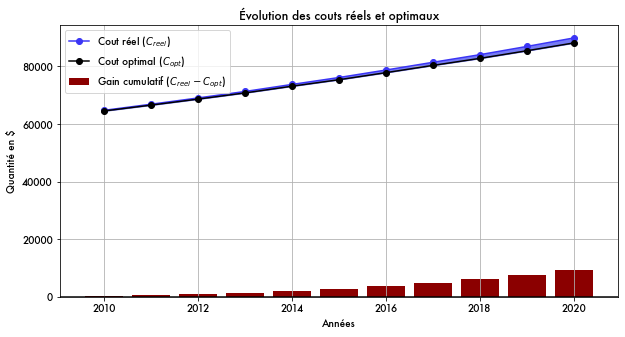

In [30]:
plt.rcParams.update({'font.sans-serif':'futura'})

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(costs['costs_reel'], "o-", color="#3b35f5", label=r"Cout réel ($ C_{reel} $)")
plt.plot(costs['costs_opt'], "o-", color="black", label=r"Cout optimal ($ C_{opt} $)")
plt.bar(costs.index, costs['gain_cumulatif'], color="#8b0000", label=r"Gain cumulatif ($ C_{reel} - C_{opt} $)")
plt.axhline(0, color='black')
plt.title("Évolution des couts réels et optimaux")
plt.fill_between(prod.index, costs['costs_reel'], costs['costs_opt'], color="#767bf4")
plt.ylabel(r"Quantité en $")
plt.xlabel("Années")
plt.legend()

Si elle avait optimisé ses coûts sur la décennie, l'entreprise aurait épargné 9326,92$. Comme le montre le graphique, l'entreprise a payé plus de coûts qu'elle ne l'aurait fait en les optimisant à chaque année (moins de travailleurs, plus de robots).